In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats

In [2]:
mut_and_host_info_file = "../../intermediate-results-downsampling/mut_and_host_info_by_tip.json"
with open(mut_and_host_info_file, 'r') as infile:
    mut_and_host_info_by_tip = json.load(infile)

In [3]:
def extract_gene_lengths(genbank_file):
    gene_lengths = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length
        gene_lengths['rdrp'] = gene_lengths.pop("rna-dependent rna polymerase")
        gene_lengths['2Omethyltransferase'] = gene_lengths.pop("2'-o-methyltransferase")
    return gene_lengths

genbank_file = "../../../nextstrain-build/phylogenetic_subsampling/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196
gene_codon_counts["s2"] = 1806

In [4]:
all_genes = set()
for info in mut_and_host_info_by_tip.values():
    all_genes.update(info['muts_on_path'].keys())

data = []
for tip, info in mut_and_host_info_by_tip.items():
    row = {'sample': tip, 'host': info['host'], 'date': info['date']}
    for gene in all_genes:
        num_mutations = len(info['muts_on_path'].get(gene, []))
        gene = gene.lower()
        num_codons = gene_codon_counts.get(gene, 1)  # default to 1 if gene not found
        mutation_rate = num_mutations / num_codons
        row[gene] = mutation_rate
    data.append(row)
df = pd.DataFrame(data)
df = df[df.host != 'Bat']
df = df[df.host != 'Llama']
mutation_rate_by_gene = df.to_csv('../../intermediate-results-downsampling/mutation_rate_by_gene.csv')

<Figure size 640x480 with 0 Axes>

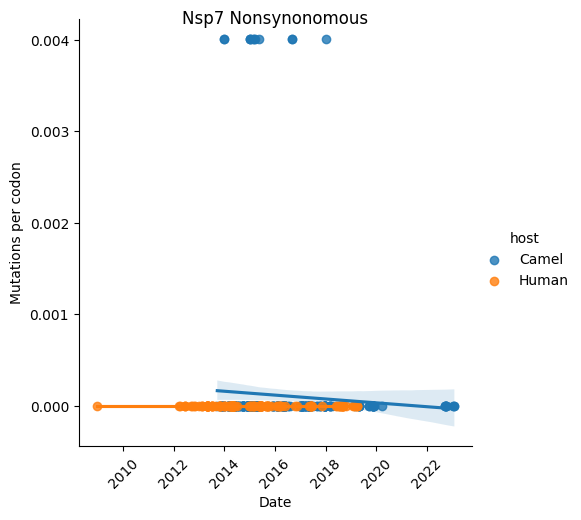

Human slope: 0.0 mutations per codon per year
Camel slope: -2.1128708336952287e-05 mutations per codon per year
P-value: 0.28023496833900874


<Figure size 640x480 with 0 Axes>

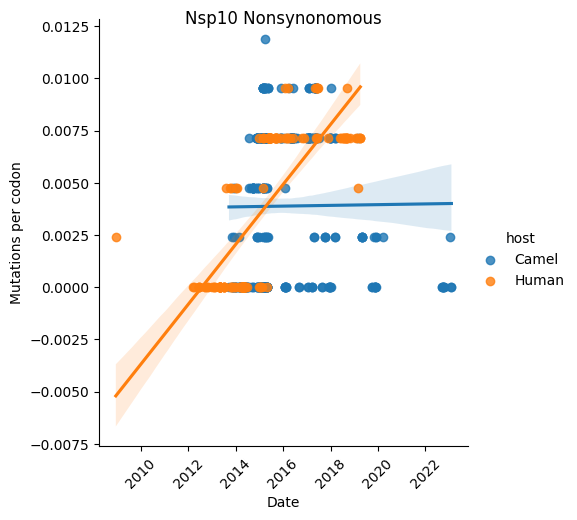

Human slope: 0.0014368982243937929 mutations per codon per year
Camel slope: 1.760361043755301e-05 mutations per codon per year
P-value: 4.284563717570121e-22


<Figure size 640x480 with 0 Axes>

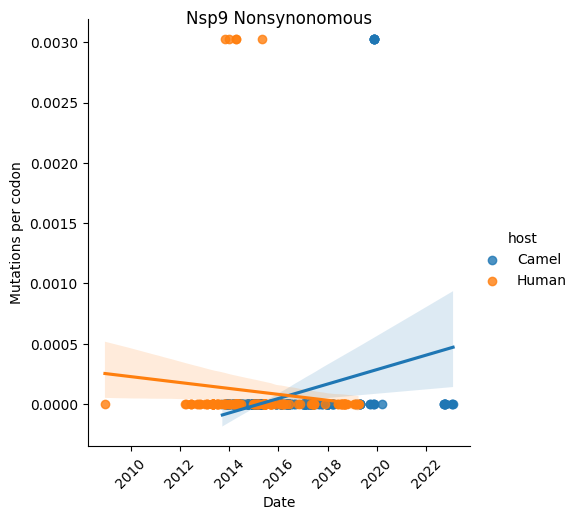

Human slope: -2.45461903109412e-05 mutations per codon per year
Camel slope: 5.994030015334588e-05 mutations per codon per year
P-value: 0.0007123352279254263


<Figure size 640x480 with 0 Axes>

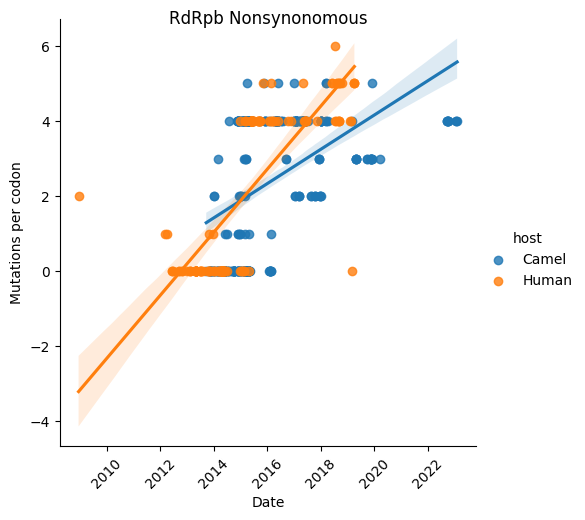

Human slope: 0.8407353080222332 mutations per codon per year
Camel slope: 0.45703839127364343 mutations per codon per year
P-value: 4.5796835045619724e-07


<Figure size 640x480 with 0 Axes>

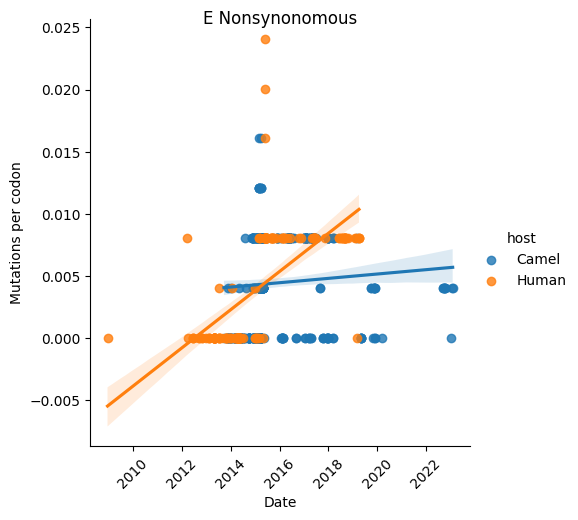

Human slope: 0.0015359921097975074 mutations per codon per year
Camel slope: 0.0001747986787096485 mutations per codon per year
P-value: 1.306747120472074e-13


<Figure size 640x480 with 0 Axes>

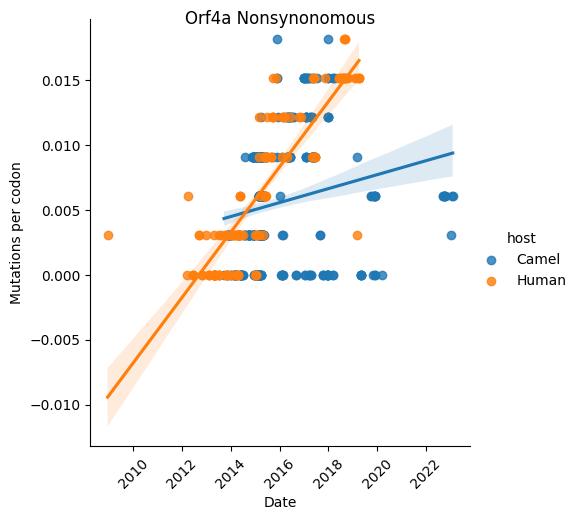

Human slope: 0.002516350323055977 mutations per codon per year
Camel slope: 0.0005375471678130887 mutations per codon per year
P-value: 5.211560158231764e-29


<Figure size 640x480 with 0 Axes>

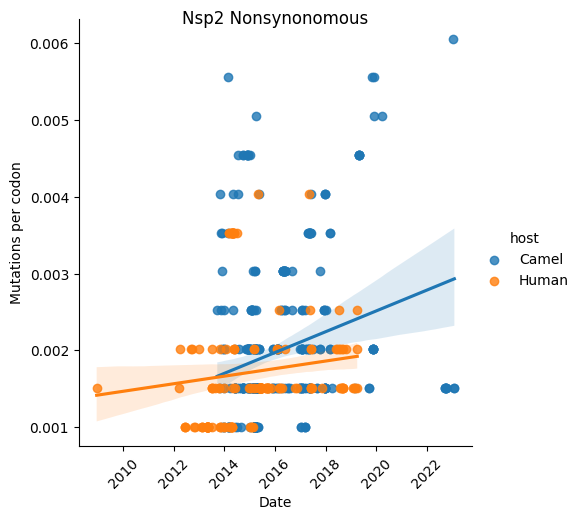

Human slope: 4.9201123195426807e-05 mutations per codon per year
Camel slope: 0.00013538545340412172 mutations per codon per year
P-value: 0.03907111100276978


<Figure size 640x480 with 0 Axes>

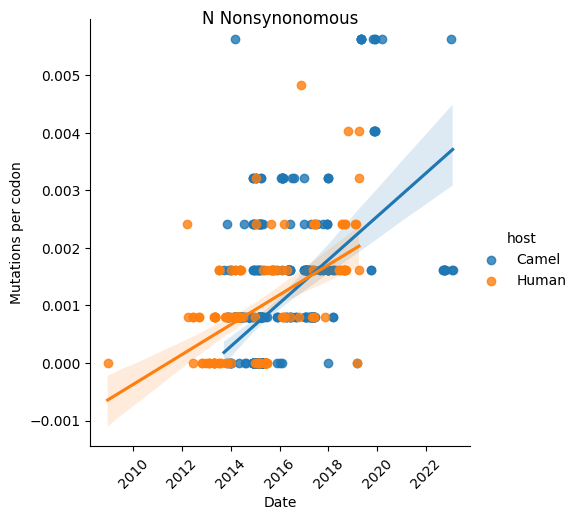

Human slope: 0.00025961274534571353 mutations per codon per year
Camel slope: 0.0003762821535610944 mutations per codon per year
P-value: 0.011527455151319725


<Figure size 640x480 with 0 Axes>

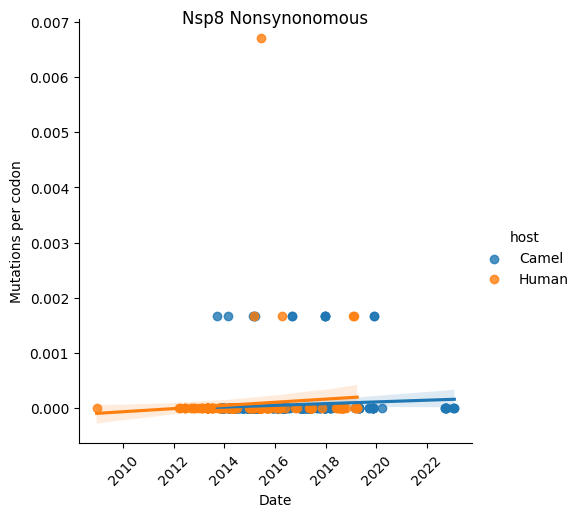

Human slope: 2.8563487878864984e-05 mutations per codon per year
Camel slope: 1.553932378474183e-05 mutations per codon per year
P-value: 0.6263081322942075


<Figure size 640x480 with 0 Axes>

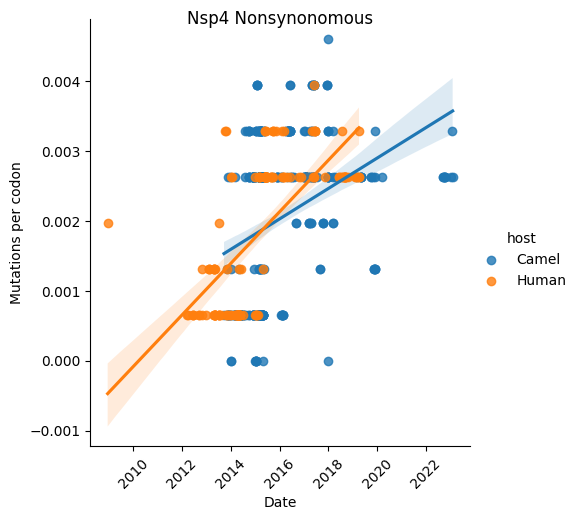

Human slope: 0.0003688634353362501 mutations per codon per year
Camel slope: 0.00021752163046708068 mutations per codon per year
P-value: 0.0006490871468985734


<Figure size 640x480 with 0 Axes>

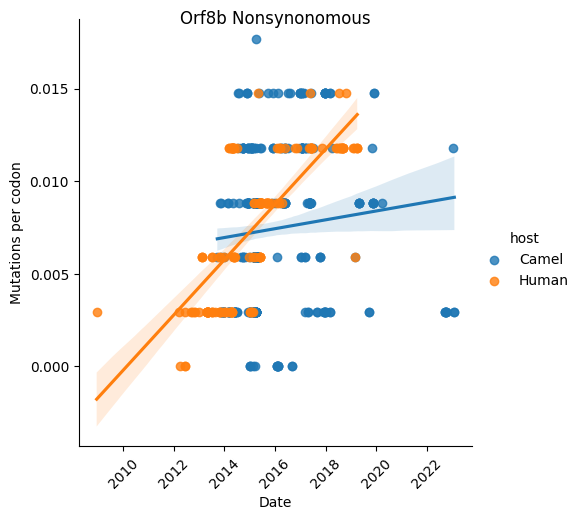

Human slope: 0.001491683129101695 mutations per codon per year
Camel slope: 0.00023898025491630212 mutations per codon per year
P-value: 2.3153958537863703e-15


<Figure size 640x480 with 0 Axes>

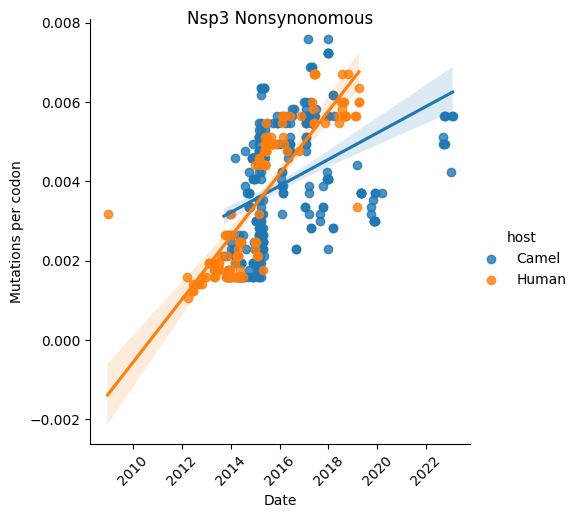

Human slope: 0.0007916140396430867 mutations per codon per year
Camel slope: 0.00033390928305266883 mutations per codon per year
P-value: 3.6868913491169105e-16


<Figure size 640x480 with 0 Axes>

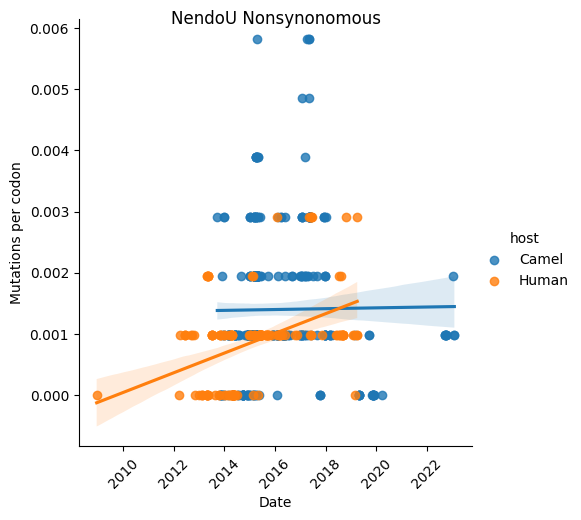

Human slope: 0.00016118021940909872 mutations per codon per year
Camel slope: 6.862559490746484e-06 mutations per codon per year
P-value: 0.0001865123649504596


<Figure size 640x480 with 0 Axes>

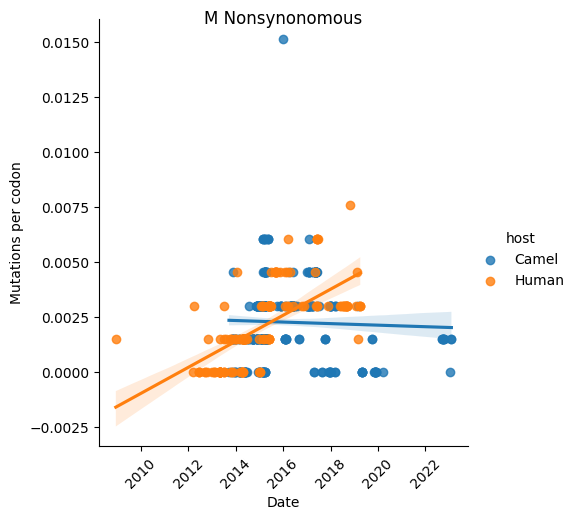

Human slope: 0.0005918631302207042 mutations per codon per year
Camel slope: -3.514233066246059e-05 mutations per codon per year
P-value: 2.209492606983643e-18


<Figure size 640x480 with 0 Axes>

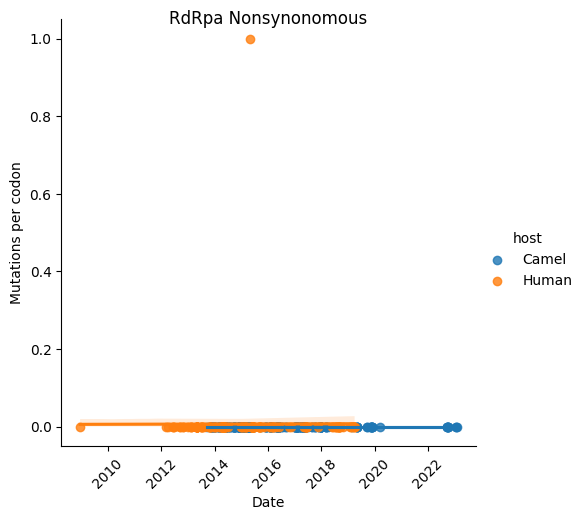

Human slope: 0.0001555022828999515 mutations per codon per year
Camel slope: 0.0 mutations per codon per year
P-value: 0.9638004604385668


<Figure size 640x480 with 0 Axes>

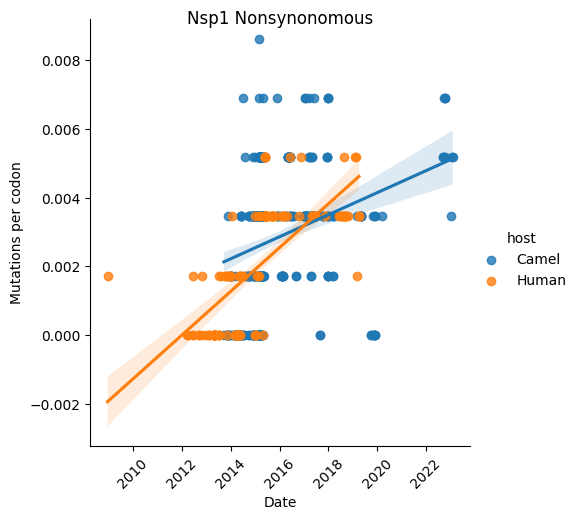

Human slope: 0.0006370734661243812 mutations per codon per year
Camel slope: 0.00032078937391405855 mutations per codon per year
P-value: 1.2362211792785215e-05


<Figure size 640x480 with 0 Axes>

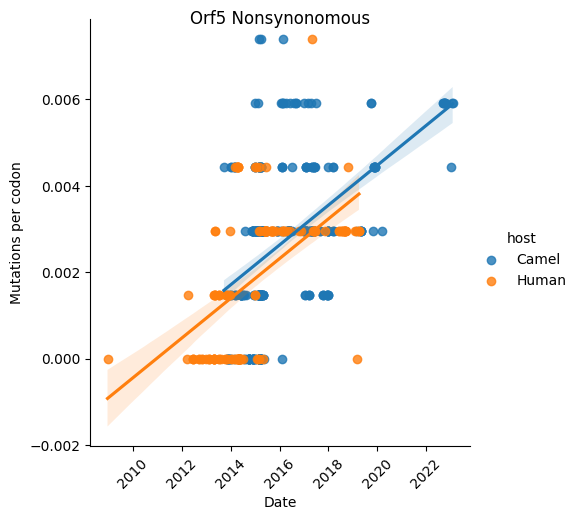

Human slope: 0.00045951111594399563 mutations per codon per year
Camel slope: 0.00046074521487807473 mutations per codon per year
P-value: 0.9858496468389297


<Figure size 640x480 with 0 Axes>

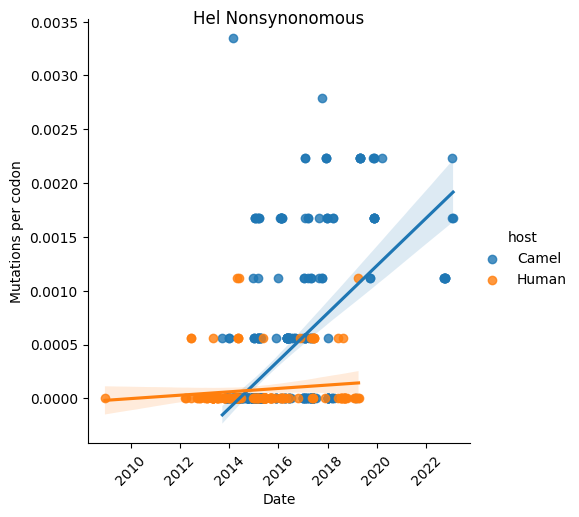

Human slope: 1.5742311003484402e-05 mutations per codon per year
Camel slope: 0.0002209142626962133 mutations per codon per year
P-value: 6.799661520654914e-30


<Figure size 640x480 with 0 Axes>

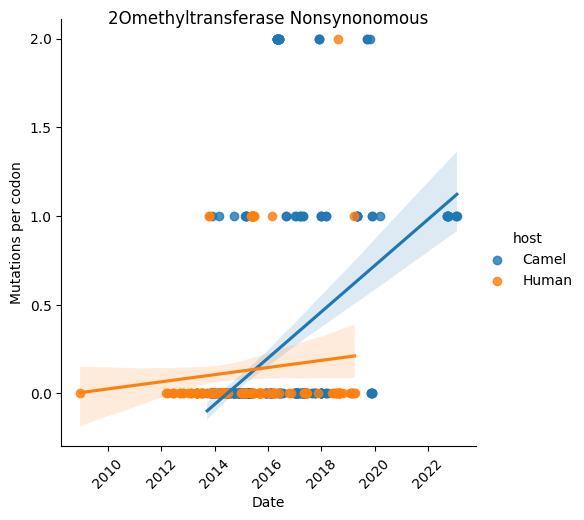

Human slope: 0.020087520426281202 mutations per codon per year
Camel slope: 0.13024907988338533 mutations per codon per year
P-value: 3.441205260340875e-08


<Figure size 640x480 with 0 Axes>

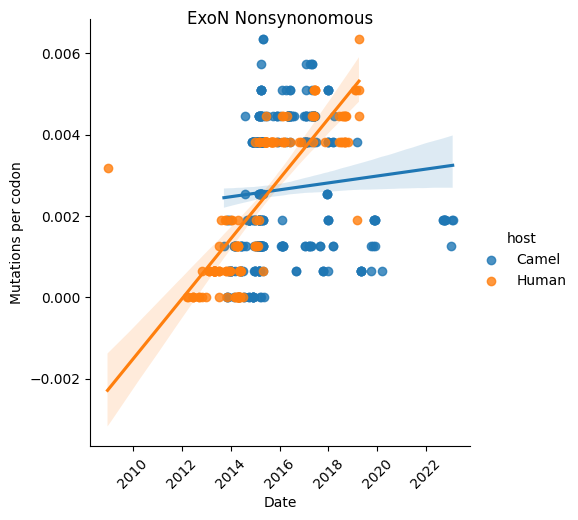

Human slope: 0.0007384490599706477 mutations per codon per year
Camel slope: 8.498716991317991e-05 mutations per codon per year
P-value: 4.0307535353093855e-23


<Figure size 640x480 with 0 Axes>

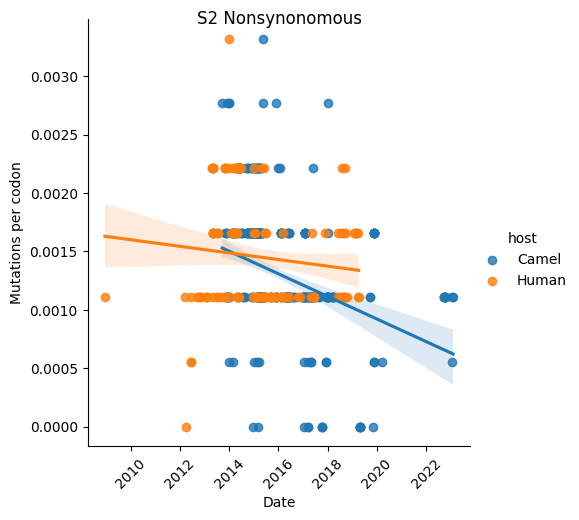

Human slope: -2.8302651692357025e-05 mutations per codon per year
Camel slope: -9.679803520772602e-05 mutations per codon per year
P-value: 0.005403741774892144


<Figure size 640x480 with 0 Axes>

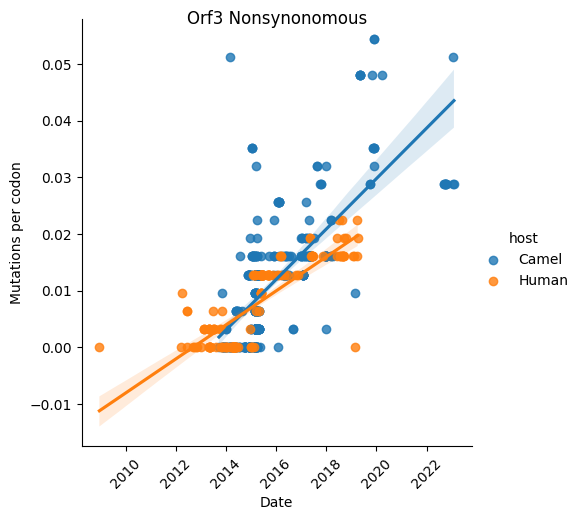

Human slope: 0.0030042594888196688 mutations per codon per year
Camel slope: 0.004453123951343939 mutations per codon per year
P-value: 2.9280221371477024e-07


<Figure size 640x480 with 0 Axes>

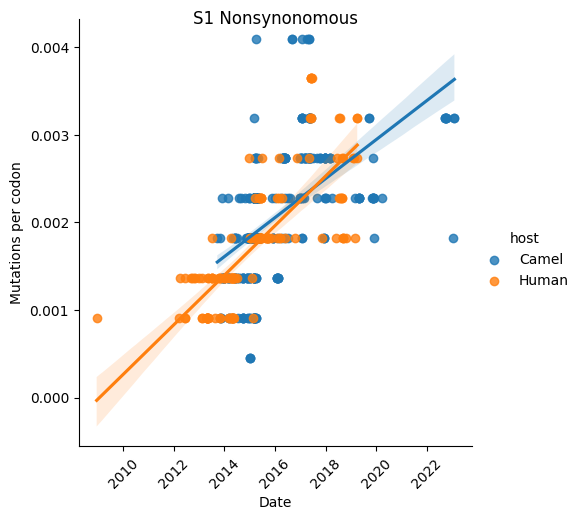

Human slope: 0.0002829951583702029 mutations per codon per year
Camel slope: 0.00022262999603801792 mutations per codon per year
P-value: 0.014819312908460596


<Figure size 640x480 with 0 Axes>

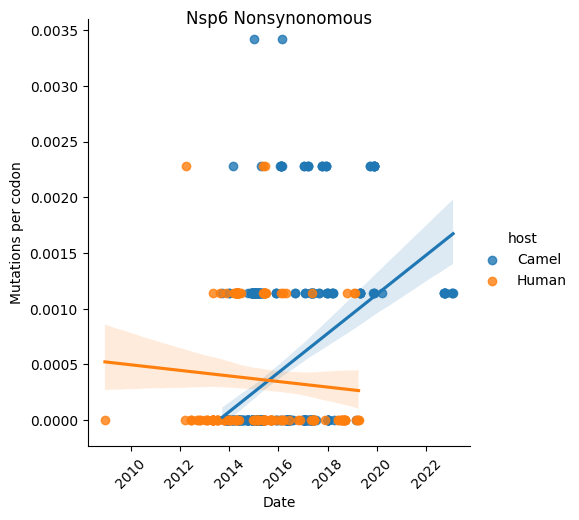

Human slope: -2.502271784983025e-05 mutations per codon per year
Camel slope: 0.0001757823451189085 mutations per codon per year
P-value: 9.700489796215466e-11


<Figure size 640x480 with 0 Axes>

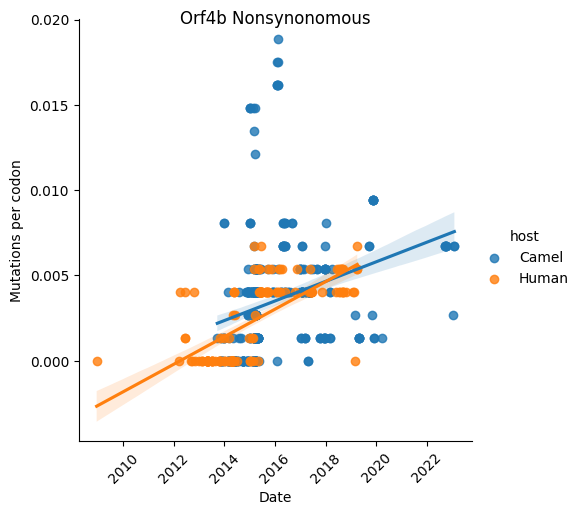

Human slope: 0.0008073054841894044 mutations per codon per year
Camel slope: 0.0005739744016947584 mutations per codon per year
P-value: 0.04253892836729668


<Figure size 640x480 with 0 Axes>

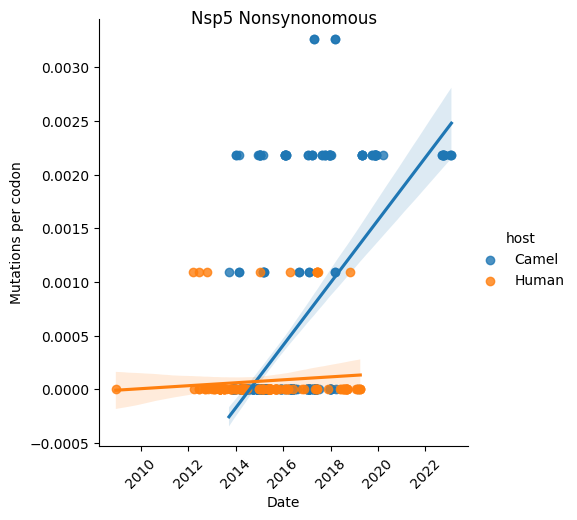

Human slope: 1.3779160264844657e-05 mutations per codon per year
Camel slope: 0.0002919552776694434 mutations per codon per year
P-value: 1.3781714620547552e-33
           Nsp7     Nsp10      Nsp9     RdRpb         E     Orf4a      Nsp2  \
Human  0.000000  0.001437 -0.000025  0.840735  0.001536  0.002516  0.000049   
Camel -0.000021  0.000018  0.000060  0.457038  0.000175  0.000538  0.000135   

              N      Nsp8      Nsp4  ...      Orf5       Hel  \
Human  0.000260  0.000029  0.000369  ...  0.000460  0.000016   
Camel  0.000376  0.000016  0.000218  ...  0.000461  0.000221   

       2Omethyltransferase      ExoN        S2      Orf3        S1      Nsp6  \
Human             0.020088  0.000738 -0.000028  0.003004  0.000283 -0.000025   
Camel             0.130249  0.000085 -0.000097  0.004453  0.000223  0.000176   

          Orf4b      Nsp5  
Human  0.000807  0.000014  
Camel  0.000574  0.000292  

[2 rows x 26 columns]


In [5]:
lin_regress = {}
lin_regress_all = {}
human_df = df[df.host == 'Human']
camel_df = df[df.host == 'Camel']
camel_slopes = list(range(0, len(all_genes)))
count = 0
for gene in all_genes:
    gene_lower = gene.lower()
    plt.figure()
    plot = sns.lmplot(x="date", y=gene_lower, hue='host', data=df)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mutations per codon')
    plt.title(gene + ' Nonsynonomous', y=0.97)
    plt.savefig("../../intermediate-results-downsampling/mutation_rate_per_gene/" + gene + "figure.png")
    plt.show()
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}
    
    #human results
    x=human_df['date'].values
    y=human_df[gene_lower].values
    human_slope, human_intercept, human_r, human_p, human_se = stats.linregress(x, y)
    lin_regress[gene]['Human'] = human_slope
    lin_regress_all[gene]['Human'] = {'slope':human_slope, 'intercept':human_intercept, 'r': human_r, 'p':human_p, 'se':human_se}

    #camel results
    x=camel_df['date'].values
    y=camel_df[gene_lower].values
    camel_slope, camel_intercept, camel_r, camel_p, camel_se = stats.linregress(x, y)
    lin_regress[gene]['Camel'] = camel_slope
    lin_regress_all[gene]['Camel'] = {'slope':camel_slope, 'intercept':camel_intercept, 'r': camel_r, 'p': camel_p, 'se':camel_se}

    #z test
    numerator = camel_slope - human_slope
    denominator = pow((pow(camel_se,2)) + (pow(human_se,2)), 1/2)
    z = numerator / denominator 
    p = scipy.stats.norm.sf(abs(z))*2

    camel_slopes[count] = camel_slope
    count += 1

    print("Human slope: " + str(human_slope) + " mutations per codon per year"),
    print("Camel slope: " + str(camel_slope) + " mutations per codon per year"),
    print("P-value: " + str(p))


#print(lin_regress)
df_results = pd.DataFrame(lin_regress)
print(df_results)

df_results_all = pd.DataFrame(lin_regress_all)
linear_regression_results = df_results.to_csv('../../intermediate-results-downsampling/linear_regression_results.csv')
linear_regression_results_all = df_results_all.to_csv('../../intermediate-results-downsampling/linear_regression_results_all.csv')


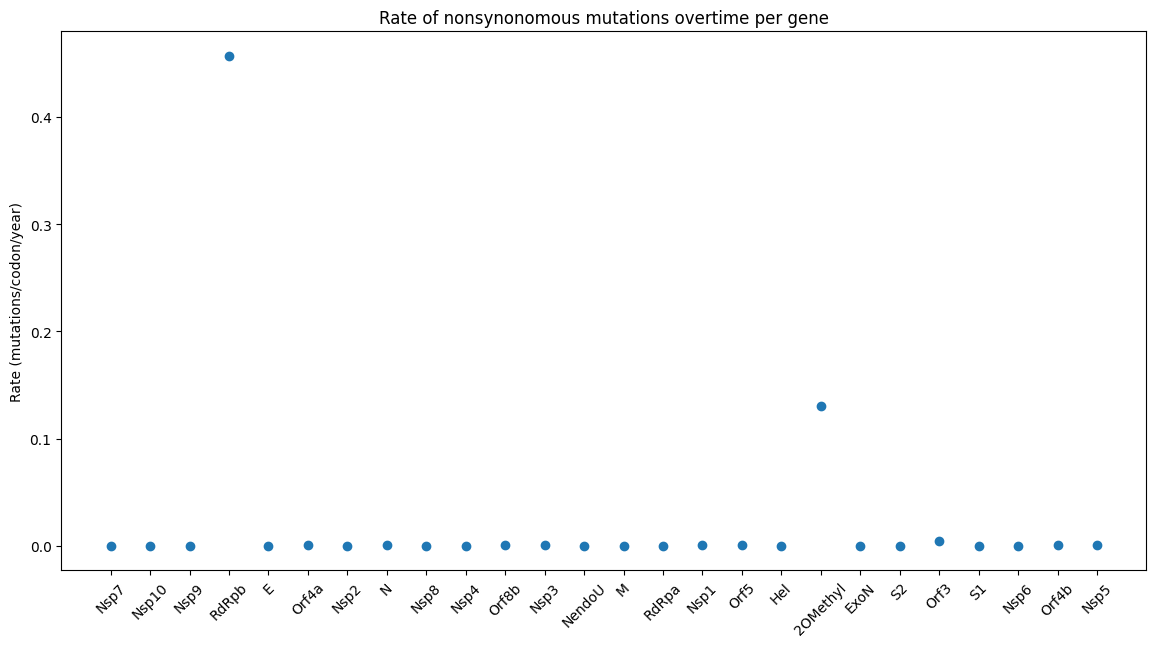

In [6]:
gene_names = list(all_genes)
for i in range(len(gene_names)):
    if gene_names[i] == '2Omethyltransferase':
        gene_names[i] = '2OMethyl'
plt.figure(figsize=(14,7))
plt.scatter(gene_names, camel_slopes)
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.ylabel("Rate (mutations/codon/year)")
plt.title("Rate of nonsynonomous mutations overtime per gene")
plt.show()